<IPython.core.display.Javascript object>


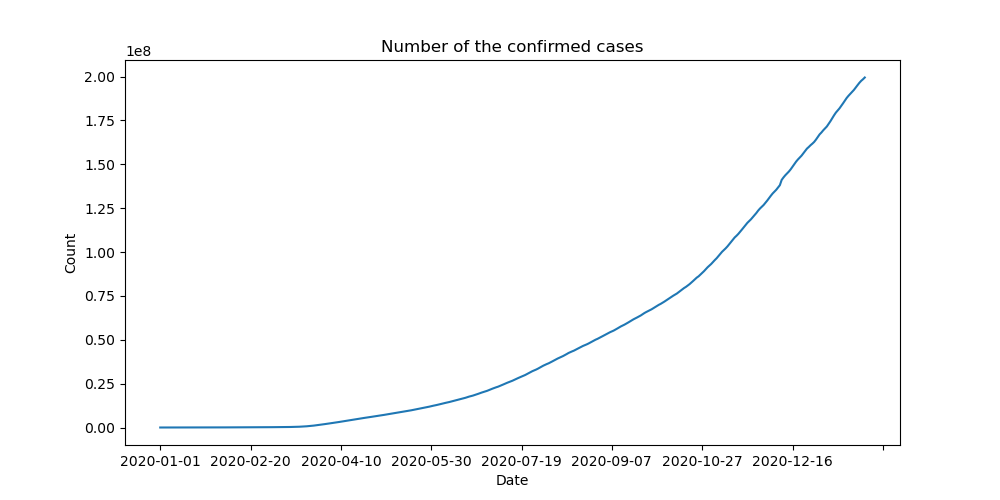

Text(0, 0.5, 'Count')

In [50]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
covid_data = pd.read_csv('C:\\Users\\양연진\\Desktop\\owid-covid-data.csv', engine = 'python')
date1 = pd.to_datetime(covid_data['date'], format= '%Y-%m-%d')

d1 = covid_data.loc[:,['date','total_cases']]
s1 = d1.groupby('date')['total_cases'].sum()
plt.figure(figsize=(10,5))
s1.plot()

plt.title("Number of the confirmed cases")
plt.xlabel("Date")
plt.ylabel("Count")

<IPython.core.display.Javascript object>


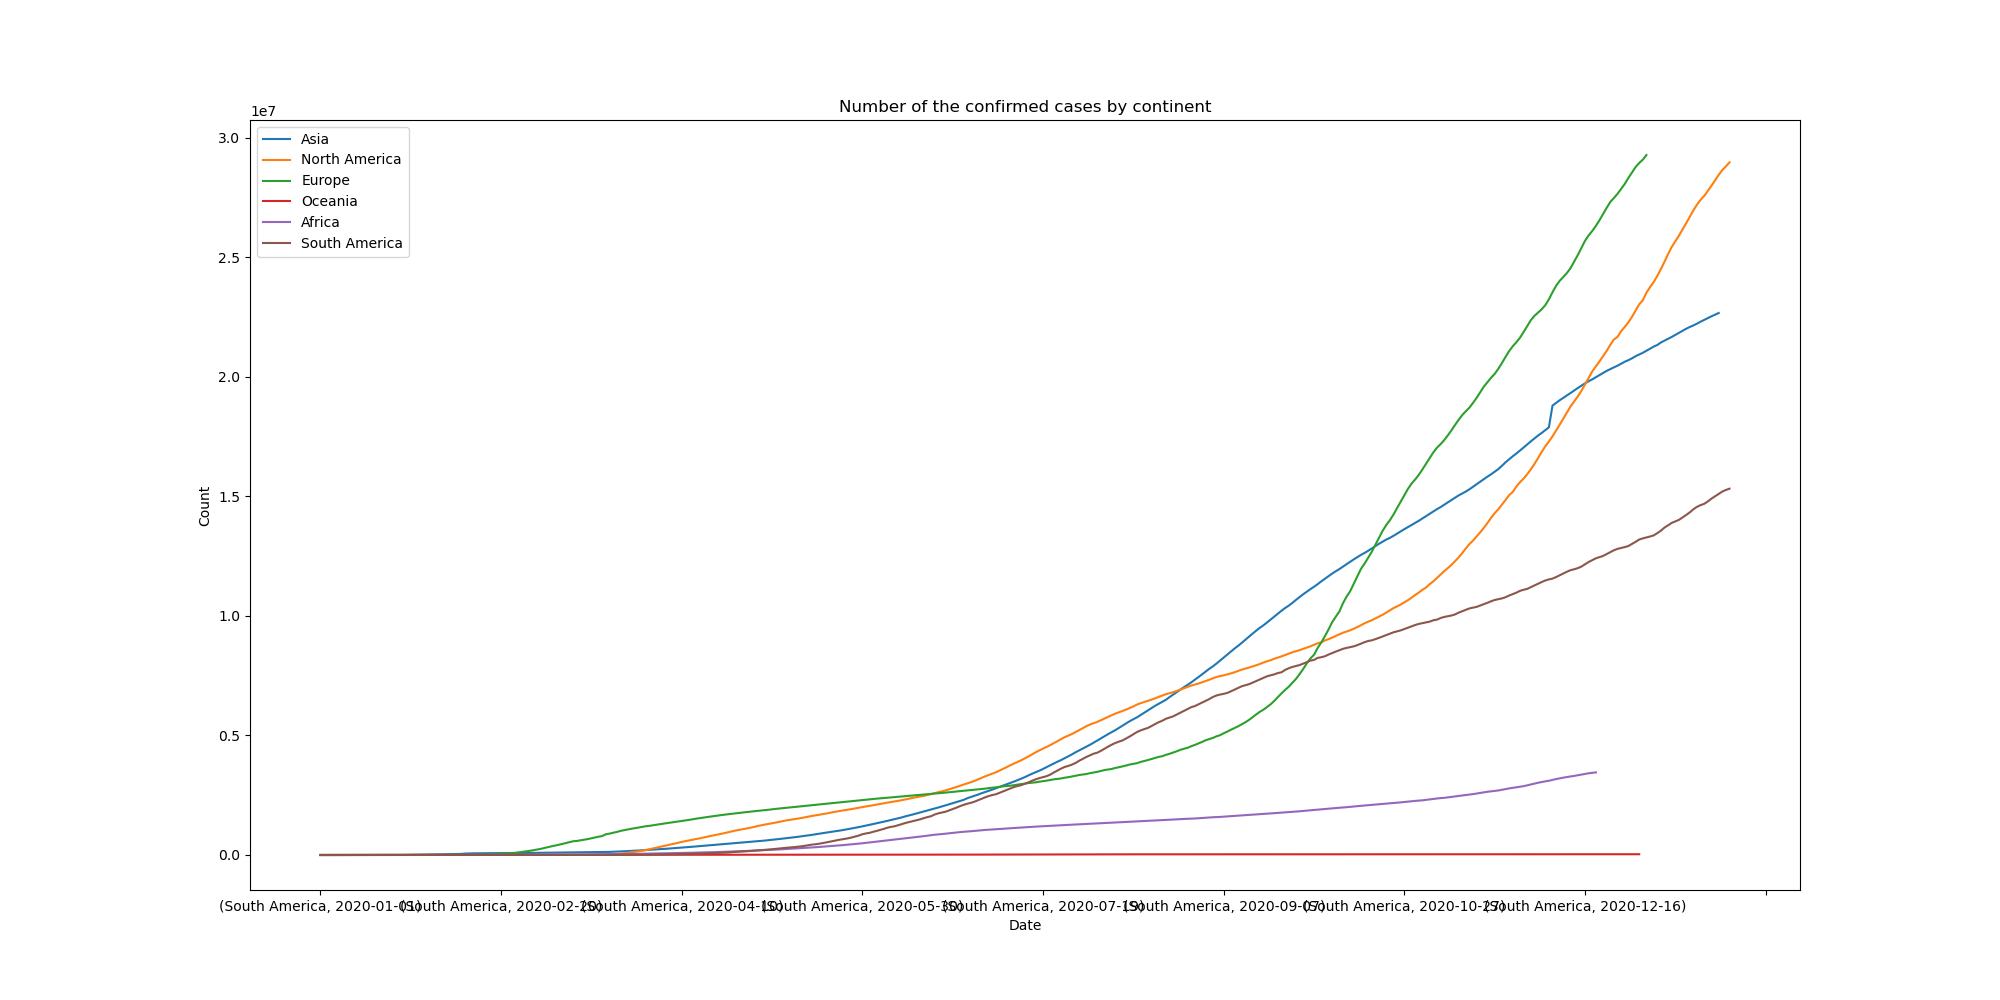

Text(0, 0.5, 'Count')

In [107]:
d2 = covid_data.loc[:,['continent','date','total_cases']]

s2 = d2.groupby(['continent','date'])['total_cases'].sum()

s2_Asia = s2.loc[['Asia'],:]
s2_North_America = s2.loc[['North America'],:]
s2_Europe = s2.loc[['Europe'],:]
s2_Oceania = s2.loc[['Oceania'],:]
s2_Africa = s2.loc[['Africa'],:]
s2_South_America = s2.loc[['South America'],:]

plt.figure(figsize=(20,10))
s2_Asia.plot()
s2_North_America.plot()
s2_Europe.plot()
s2_Oceania.plot()
s2_Africa.plot()
s2_South_America.plot()



plt.legend(['Asia', 'North America', 'Europe', 'Oceania', 'Africa', 'South America'])
plt.title("Number of the confirmed cases by continent")
plt.xlabel("Date")
plt.ylabel("Count")

#2번 문제 대륙별 날자별 확진자 수_ date에 South America가 없어지려면?

<IPython.core.display.Javascript object>


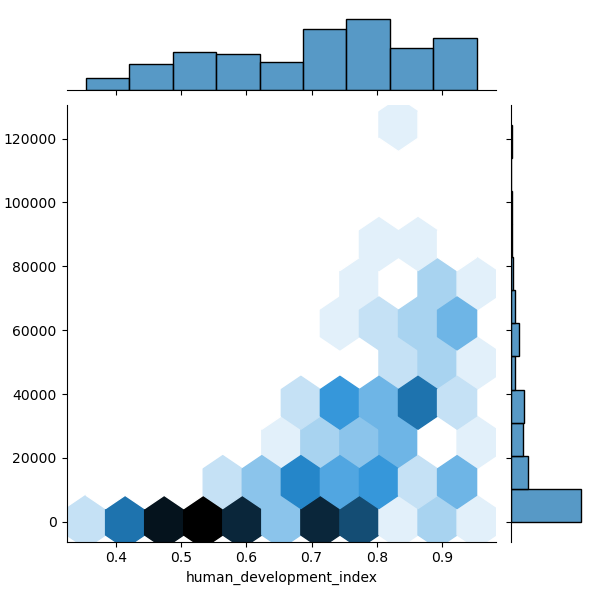

In [91]:
d3 = covid_data.loc[:,['date','total_cases_per_million','human_development_index']]
d4 = d3.groupby('date')[['total_cases_per_million','human_development_index']]
d5 = d4.get_group('2021-01-25')
hexbin = sns.jointplot(x=d5['human_development_index'], y=d5['total_cases_per_million'], kind='hex')

#3번 문제 가장 최근 일자 기준 HDI(인간개발지수)와 확진자 비율 간의 상관관계_y축이...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62239 entries, 0 to 62238
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               61885 non-null  object 
 1   continent                              61515 non-null  object 
 2   location                               62239 non-null  object 
 3   date                                   62239 non-null  object 
 4   total_cases                            61642 non-null  float64
 5   new_cases                              61635 non-null  float64
 6   new_cases_smoothed                     60675 non-null  float64
 7   total_deaths                           53092 non-null  float64
 8   new_deaths                             53091 non-null  float64
 9   new_deaths_smoothed                    60675 non-null  float64
 10  total_cases_per_million                61288 non-null  float64
 11  ne

<IPython.core.display.Javascript object>


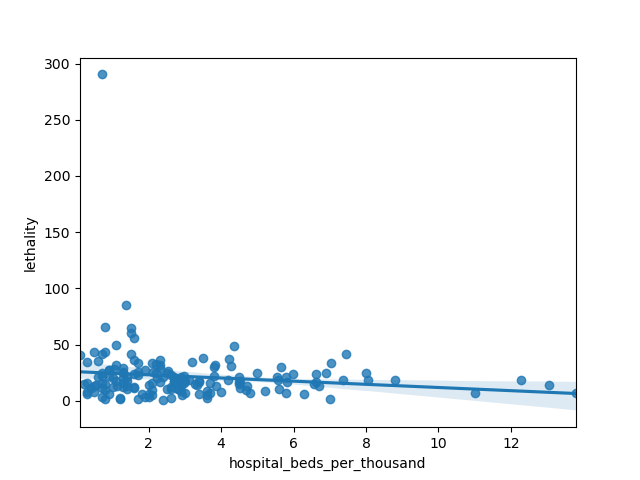

<IPython.core.display.Javascript object>


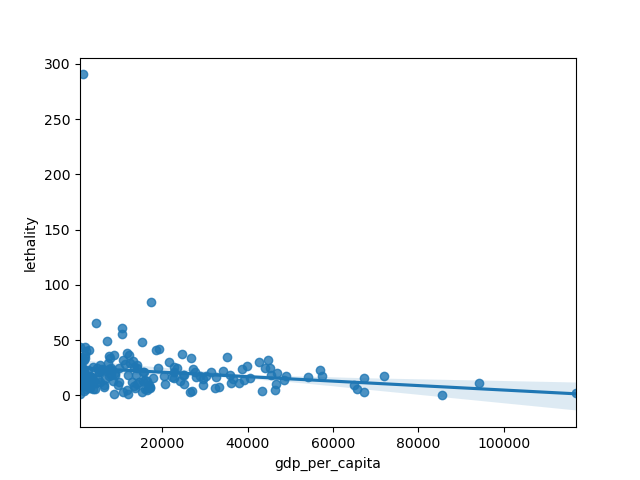

<IPython.core.display.Javascript object>


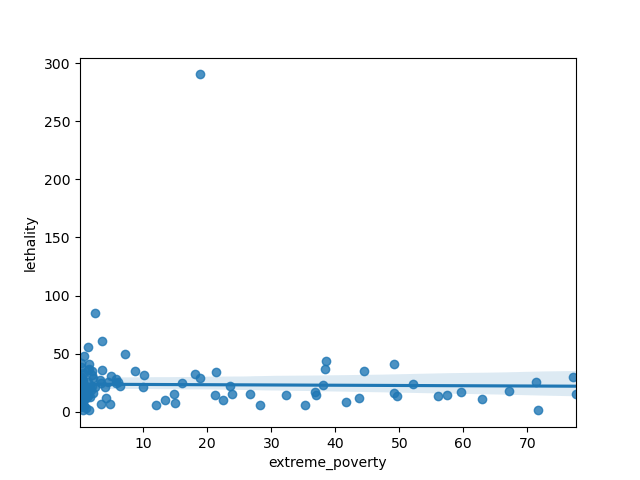

In [123]:
covid_data.info()

import numpy as np

d6 = covid_data.groupby('date')[['location','total_cases','total_deaths','hospital_beds_per_thousand']]
d7 = d6.get_group('2021-01-25')
d7 = d7.dropna()

lethality = (d7['total_deaths'] / d7['total_cases']) * 1000
d7['lethality'] = (lethality)
ax = plt.subplots()
ax = sns.regplot(x='hospital_beds_per_thousand', y='lethality', data = d7)

t1 = covid_data.groupby('date')[['location','total_cases','total_deaths','gdp_per_capita']]
t2 = t1.get_group('2021-01-25')
t2 = t2.dropna()
lethality = (t2['total_deaths'] / t2['total_cases']) * 1000
t2['lethality'] = (lethality)
ax = plt.subplots()
ax = sns.regplot(x='gdp_per_capita', y='lethality', data = t2)

p1 = covid_data.groupby('date')[['location','total_cases','total_deaths','extreme_poverty']]
p2 = p1.get_group('2021-01-25')
p2 = p2.dropna()
lethality = (p2['total_deaths'] / p2['total_cases']) * 1000
p2['lethality'] = (lethality)
ax = plt.subplots()
ax = sns.regplot(x='extreme_poverty', y='lethality', data = p2)
# 현재 확진자 중 사망자 수 그리고 나라별로 묶어서 병상수와 비교 total_deaths / total_cases * 1000
# 나라별로 알록달록하게 하고 싶어요....
# 병상 수보다 gdp가 더 큰 요인일까?
# 하나 튀는 데이터 삭제하고 다시 그려볼까 생각 중...